## ASSIGNMENT 1 - Backpropagation

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# set up Data
X = np.eye(8)    # input
Y = X.copy()     # output

n_input = 8
n_hidden = 3
n_output = 8

np.random.seed(0)   # for reproducibility

W1 = np.random.randn(n_input, n_hidden) * 0.1
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.1
b2 = np.zeros((1, n_output))

print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(X.shape, Y.shape)


(8, 3) (1, 3)
(3, 8) (1, 8)
(8, 8) (8, 8)


In [120]:
# Activation Function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)    


In [121]:
# Feedforward Phase 

def feedforwrd(X): 
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # hidden layer activations 

    z2 = np.dot(a1, W2) + b2
    Y_hat = sigmoid(z2)  # final output 

    return z1, z2, a1, Y_hat

In [122]:
# Backpropagation Phase 

def backprop(X, Y, a1, Y_hat, z1, z2, lr = 0.5) : 
    global W1, b1, W2, b2

    # Output layer error 
    error = Y_hat - Y
    dY_hat = error * sigmoid_derivative(z2) 

    # Hidden layer error 
    d_a1 = np.dot(dY_hat, W2.T) * sigmoid_derivative(z1)

    # Update weights and biases
    W2 -= np.dot(a1.T, dY_hat) * lr
    b2 -= np.sum(dY_hat, axis = 0, keepdims = True) * lr 

    W1 -= np.dot(X.T, d_a1) * lr
    b1 -= np.sum(d_a1, axis = 0, keepdims = True) * lr

    return np.mean(np.abs(Y - Y_hat))

In [123]:
# --- Training loop ---

def mse_loss(Y_hat, Y):
    return 0.5 * np.mean((Y_hat - Y)**2)

epochs = 10000
lr = 1

for epoch in range(epochs):
    # --- Forward ---
    z1, z2, a1, Y_hat = feedforwrd(X)

    # --- Compute loss ---
    loss = mse_loss(Y_hat, Y)

    # --- Backpropagation & update ---
    mae = backprop(X, Y, a1, Y_hat, z1, z2, lr)


    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} | MSE loss: {loss:.6f} | MAE: {mae:.6f}")


print("\nFinal predictions after training:")
print(np.round(Y_hat, 3))


Epoch     0 | MSE loss: 0.125112 | MAE: 0.499326
Epoch  1000 | MSE loss: 0.001069 | MAE: 0.031205
Epoch  2000 | MSE loss: 0.000414 | MAE: 0.019510
Epoch  3000 | MSE loss: 0.000255 | MAE: 0.015288
Epoch  4000 | MSE loss: 0.000183 | MAE: 0.012955
Epoch  5000 | MSE loss: 0.000142 | MAE: 0.011429
Epoch  6000 | MSE loss: 0.000117 | MAE: 0.010332
Epoch  7000 | MSE loss: 0.000098 | MAE: 0.009497
Epoch  8000 | MSE loss: 0.000085 | MAE: 0.008833
Epoch  9000 | MSE loss: 0.000075 | MAE: 0.008289

Final predictions after training:
[[0.977 0.    0.    0.012 0.019 0.    0.01  0.   ]
 [0.    0.98  0.    0.    0.018 0.011 0.011 0.   ]
 [0.    0.    0.977 0.013 0.    0.012 0.018 0.   ]
 [0.015 0.    0.014 0.981 0.    0.    0.    0.017]
 [0.01  0.01  0.    0.    0.972 0.    0.    0.008]
 [0.    0.014 0.012 0.    0.    0.982 0.    0.017]
 [0.019 0.016 0.012 0.    0.    0.    0.978 0.   ]
 [0.    0.    0.    0.01  0.019 0.01  0.    0.979]]


In [134]:
# --- Training loop ---

def mse_loss(Y_hat, Y):
    return 0.5 * np.mean((Y_hat - Y)**2)

# Parameters
epochs = 10000
learning_rates = [0.1, 0.5, 1.0, 1.5]

errors_dict = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # --- Same initialization for fair comparison ---
    np.random.seed(0)
    W1 = np.random.randn(n_input, n_hidden) * 0.1
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.1
    b2 = np.zeros((1, n_output))

    losses = []

    
    for epoch in range(epochs):
        # Forward
        z1, z2, a1, Y_hat = feedforwrd(X)

      
        loss = mse_loss(Y_hat, Y)
        losses.append(loss)

        # Backpropagation & update
        mae = backprop(X, Y, a1, Y_hat, z1, z2, lr)

        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:5d} | MSE loss: {loss:.6f}")

    
    errors_dict[lr] = losses
    print(f"Final MSE for lr={lr}: {loss:.6f}")


Training with learning rate = 0.1
Epoch     0 | MSE loss: 0.125112
Epoch  1000 | MSE loss: 0.046585
Epoch  2000 | MSE loss: 0.028450
Epoch  3000 | MSE loss: 0.016147
Epoch  4000 | MSE loss: 0.010020
Epoch  5000 | MSE loss: 0.008503
Epoch  6000 | MSE loss: 0.007822
Epoch  7000 | MSE loss: 0.007368
Epoch  8000 | MSE loss: 0.006954
Epoch  9000 | MSE loss: 0.006493
Final MSE for lr=0.1: 0.005798

Training with learning rate = 0.5
Epoch     0 | MSE loss: 0.125112
Epoch  1000 | MSE loss: 0.008452
Epoch  2000 | MSE loss: 0.001346
Epoch  3000 | MSE loss: 0.000631
Epoch  4000 | MSE loss: 0.000418
Epoch  5000 | MSE loss: 0.000313
Epoch  6000 | MSE loss: 0.000250
Epoch  7000 | MSE loss: 0.000208
Epoch  8000 | MSE loss: 0.000178
Epoch  9000 | MSE loss: 0.000156
Final MSE for lr=0.5: 0.000138

Training with learning rate = 1.0
Epoch     0 | MSE loss: 0.125112
Epoch  1000 | MSE loss: 0.001069
Epoch  2000 | MSE loss: 0.000414
Epoch  3000 | MSE loss: 0.000255
Epoch  4000 | MSE loss: 0.000183
Epoch  5

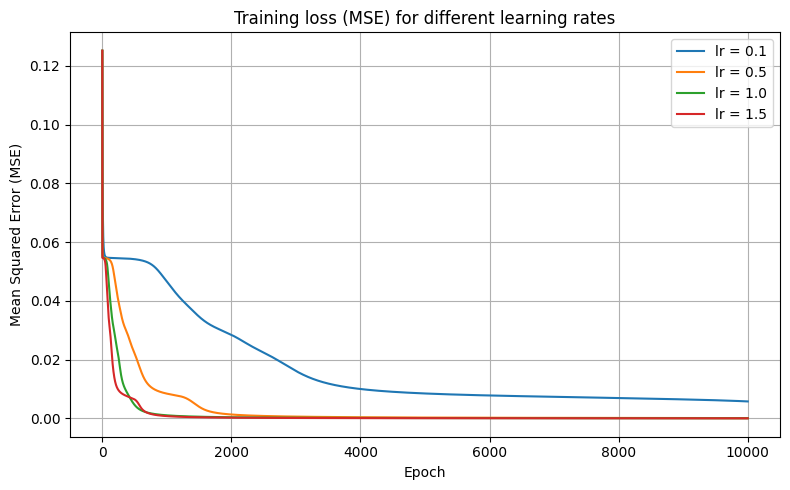

In [135]:
plt.figure(figsize=(8,5))
for lr, losses in errors_dict.items():
    plt.plot(losses, label=f"lr = {lr}")

plt.title("Training loss (MSE) for different learning rates")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
print("W1 (input → hidden):")
print(np.round(W1, 3))
print("\nHidden activations (a1):")
print(np.round(a1, 3))

print("\nW2 (hidden → output):")
print(np.round(W2, 3))
print("\nNetwork output (Y_hat):")
print(np.round(Y_hat, 3))


W1 (input → hidden):
[[ 5.325 -5.194  0.506]
 [ 4.481  2.316 -4.607]
 [-6.255 -2.708 -0.387]
 [-0.614 -3.413  5.707]
 [ 5.28   4.914  5.058]
 [-2.506  4.595 -4.465]
 [-0.075 -3.999 -5.759]
 [-4.782  3.991  3.527]]

Hidden activations (a1):
[[0.996 0.006 0.564]
 [0.99  0.919 0.008]
 [0.002 0.069 0.346]
 [0.377 0.036 0.996]
 [0.995 0.993 0.992]
 [0.084 0.991 0.009]
 [0.509 0.02  0.002]
 [0.009 0.984 0.964]]

W2 (hidden → output):
[[ 13.957  10.047 -18.212  -4.003   8.012  -9.144   2.855  -9.785]
 [ -9.685   4.519  -8.412 -10.329   4.945   7.664 -10.973   5.863]
 [  1.786  -9.706  -2.369  14.469   8.045 -10.034 -17.545   8.383]]

Network output (Y_hat):
[[0.979 0.005 0.    0.012 0.012 0.    0.011 0.   ]
 [0.002 0.986 0.    0.    0.012 0.01  0.009 0.   ]
 [0.    0.    0.977 0.014 0.    0.004 0.015 0.002]
 [0.014 0.    0.013 0.982 0.003 0.    0.    0.009]
 [0.007 0.007 0.    0.    0.981 0.    0.    0.006]
 [0.    0.01  0.009 0.    0.    0.986 0.    0.012]
 [0.017 0.01  0.014 0.    0.    0.0